In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import model_selection, metrics, ensemble, linear_model, tree, neighbors
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LinearRegression, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor


In [3]:
df=pd.read_csv("Melbourne_housing_FULL.csv")
dk=pd.read_csv("MELBOURNE_HOUSE_PRICES_LESS.csv")

In [4]:
ilkbes = df.head()
ilkbes

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [5]:
#4.2
#satir(line) sayisi, sutun(column) sayisi
shape= df.shape
#column (sutun sayisi)
column_len=len(df.columns)
#size (toplam veri elemani)
size=df.size

#4.3
#veri seti bilgileri
information=df.info
#sutun isimleri
column=df.columns
#column data types
column_dtypes=df.dtypes
#hafiza kullanimi
memory_usage=df.memory_usage(deep=True).sum()
#range index
range_index=df.index
#bos olmayan hucre sayisi
numberofcells=df.count()

In [6]:
shape

(34857, 21)

In [7]:
#5.1
describe=df.describe
#5.2 object olanları categori yapmak
object_columns = df.select_dtypes(include=['object']).columns
for column in object_columns:
  df[column] = df[column].astype('category')
column_dtypes=df.dtypes
#5.3 tekrarlanan verileri kaldirmak
duplicates = df.duplicated()
df_clean = df.drop_duplicates()
df=df_clean
#5.4 aykirilar
# Aykırı değerleri belirlemek için bir Z-Puan eşik değeri belirleyin
z_score_threshold = 3  # Genellikle kullanılan bir eşik değer
# Kategorik sütunları geçici olarak kaldırın
df_numeric = df.select_dtypes(include=[np.number])
# Tüm sayısal sütunlardaki Z-Puanları hesaplayın
z_puanlar = np.abs((df_numeric - df_numeric.mean()) / df_numeric.std())
# Herhangi bir sütunda en az bir aykırı değer içeren satırları bulun
aykırılar_satır = z_puanlar[z_puanlar > z_score_threshold].dropna(how='all')
# Aykırı değerleri temizlemek
df_temiz = df.drop(aykırılar_satır.index)
# Sonuçları görüntüleyin
print("Temizlenmiş Veri Seti:")
print(df_temiz)

print("\nAykırı Değerlerin Olduğu Satırlar:")
print(aykırılar_satır)
# yeni verileri olusturma
df=df_temiz

#5.5
categorical_columns = ["Bathroom", "Car"]  # Doldurmak istediğiniz sütunları buraya ekleyin
for column in categorical_columns:
    df[column] = df[column].fillna(df[column].mode().iloc[0])


Temizlenmiş Veri Seti:
           Suburb             Address  Rooms Type      Price Method  \
0      Abbotsford       68 Studley St      2    h        NaN     SS   
1      Abbotsford        85 Turner St      2    h  1480000.0      S   
2      Abbotsford     25 Bloomburg St      2    h  1035000.0      S   
3      Abbotsford  18/659 Victoria St      3    u        NaN     VB   
4      Abbotsford        5 Charles St      3    h  1465000.0     SP   
...           ...                 ...    ...  ...        ...    ...   
34852  Yarraville         13 Burns St      4    h  1480000.0     PI   
34853  Yarraville       29A Murray St      2    h   888000.0     SP   
34854  Yarraville      147A Severn St      2    t   705000.0      S   
34855  Yarraville    12/37 Stephen St      3    h  1140000.0     SP   
34856  Yarraville    3 Tarrengower St      2    h  1020000.0     PI   

             SellerG        Date  Distance  Postcode  ...  Bathroom  Car  \
0             Jellis   3/09/2016       2.5    30

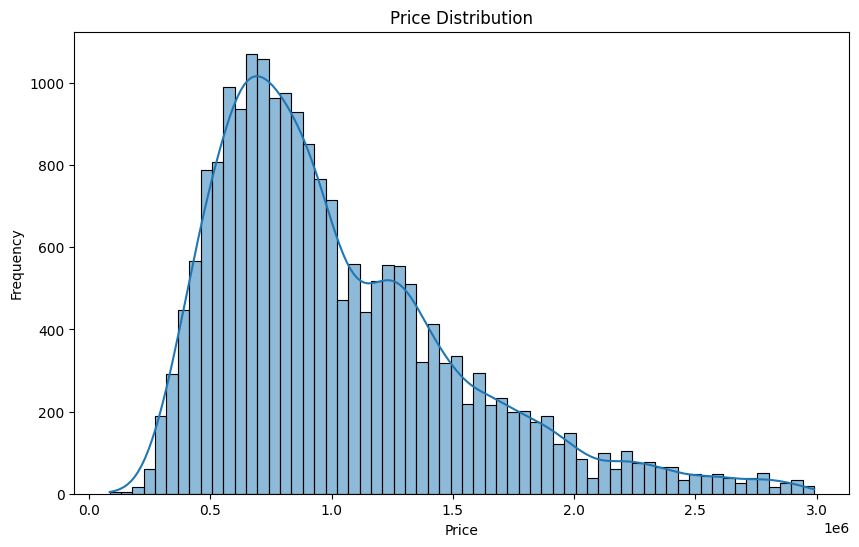

In [11]:
#Data Visualization
#part1
#Fiyat sütununun histogramını oluşturun
plt.figure(figsize=(10, 6))  # Grafik boyutunu ayarlayabilirsiniz
sns.histplot(df['Price'], kde=True)  # 'Price' sütununun histogramını ve yoğunluk tahminini çizin
plt.title('Price Distribution')  # Grafik başlığı
plt.xlabel('Price')  # X ekseninin etiketi
plt.ylabel('Frequency')  # Y ekseninin etiketi
plt.show()  # Grafiği görüntüle


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


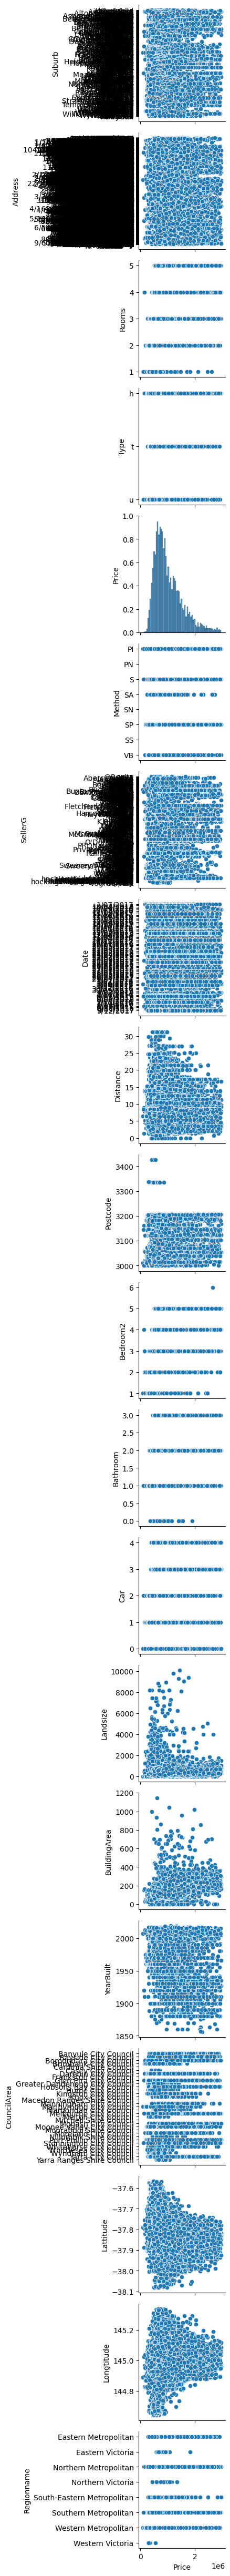

In [ ]:
#part2
# Tüm sayısal değişkenlerin çift grafiklerini oluşturun
sns.pairplot(df, x_vars=['Price'], y_vars=df.columns[:-1])
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


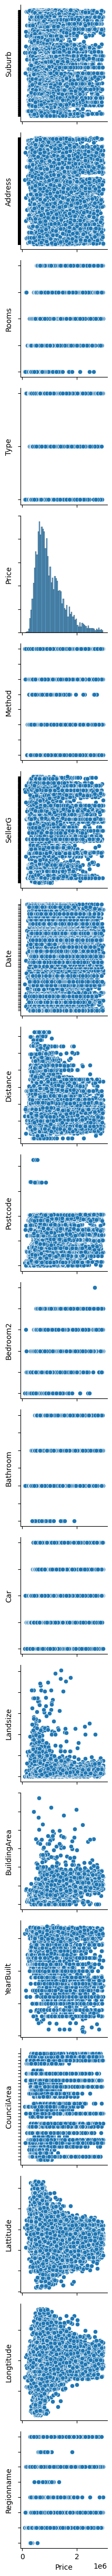

<Figure size 1200x1200 with 0 Axes>

In [ ]:
#part2(opsiyonel)
g = sns.pairplot(df, x_vars=['Price'], y_vars=df.columns[:-1])
g.set(yticklabels=[])
plt.figure(figsize=(12, 12))
plt.show()


<ipython-input-42-dc10eb33e331>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


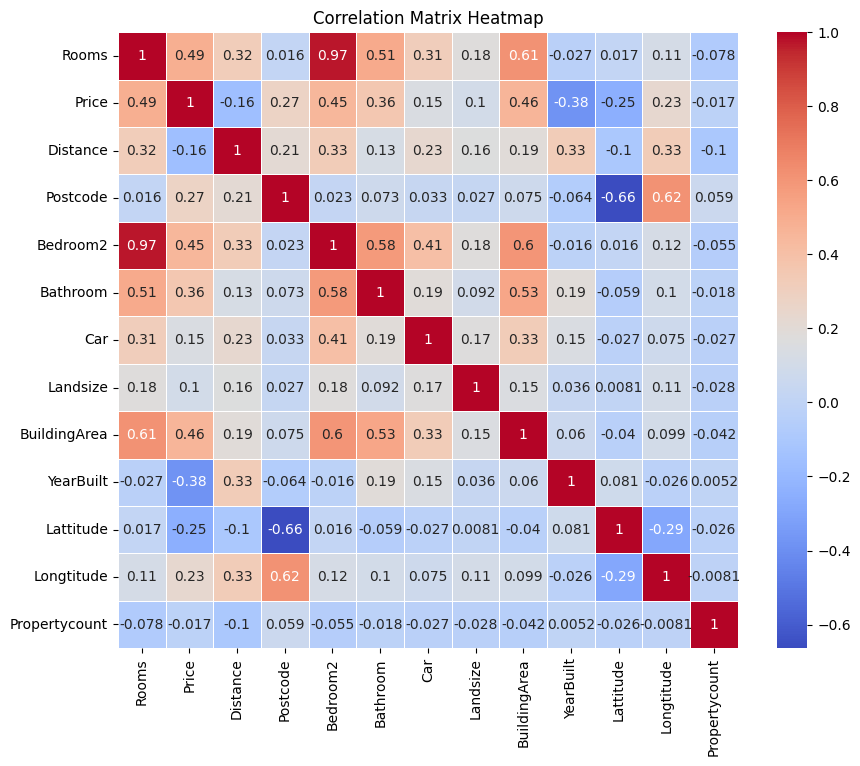

In [ ]:
#part3
# Calculate the correlation matrix
correlation_matrix = df.corr()
# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [8]:
#part4 / Label Encoder
label_encoder = LabelEncoder()
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [9]:
#part4 / One Hot Encoder
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)


In [10]:
df.fillna(df.mean(), inplace=True)  # NaN değerleri sütun ortalamalarıyla doldurur


<ipython-input-10-0fee86ee0630>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)  # NaN değerleri sütun ortalamalarıyla doldurur


In [ ]:
X = df.drop('Price', axis=1)  # Bağımsız değişkenleri seçin
X = pd.get_dummies(X)  # Metin sütunlarını sayısal özelliklere dönüştürün
Y = df['Price']  # Bağımlı değişkeni seçin

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

models = {
    'Lasso': {'model': Lasso()},
    'LinearRegression': {'model': LinearRegression()},
    'Ridge': {'model': Ridge()},
    'ElasticNet': {'model': ElasticNet()},
    'KNeighborsRegressor': {'model': KNeighborsRegressor()},
    'RandomForestRegressor': {'model': RandomForestRegressor()},
    'GradientBoostingRegressor': {'model': GradientBoostingRegressor()},
    'AdaBoostRegressor': {'model': AdaBoostRegressor(n_estimators=5, learning_rate=1.2, loss='exponential', random_state=2)}
}

for model_name, model_config in models.items():
    model = model_config['model']
    model.fit(X_train, Y_train)
    score = model.score(X_test, Y_test)
    print(f'{model_name} R-kare değeri: {score}')


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Model performansını değerlendirme
for model_name, model_config in models.items():
    model = model_config['model']
    Y_pred = model.predict(X_test)
    mae = mean_absolute_error(Y_test, Y_pred)
    mse = mean_squared_error(Y_test, Y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(Y_test, Y_pred)

    print(f'{model_name} Model Değerlendirmesi:')
    print(f'MAE: {mae}')
    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')
    print(f'R2: {r2}')
    print('-' * 40)
